In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("D:\Coding\Python\Heart_Disease_Project\heart+disease\heart_disease.csv")
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

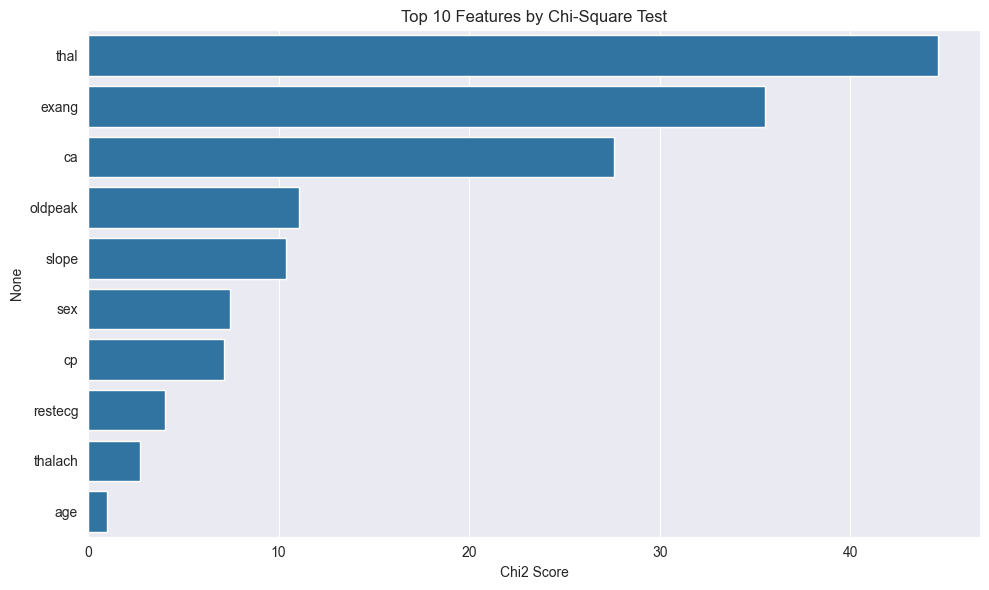

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns
import matplotlib.pyplot as plt

X_chi2 = MinMaxScaler().fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_chi2, y)

chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=chi2_scores.values[:10], y=chi2_scores.index[:10])
plt.title("Top 10 Features by Chi-Square Test")
plt.xlabel("Chi2 Score")
plt.tight_layout()
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

rfe_selected = X.columns[rfe.support_]
print("Features Selected by RFE:", list(rfe_selected))

Features Selected by RFE: ['thalach', 'exang', 'oldpeak', 'ca', 'thal']


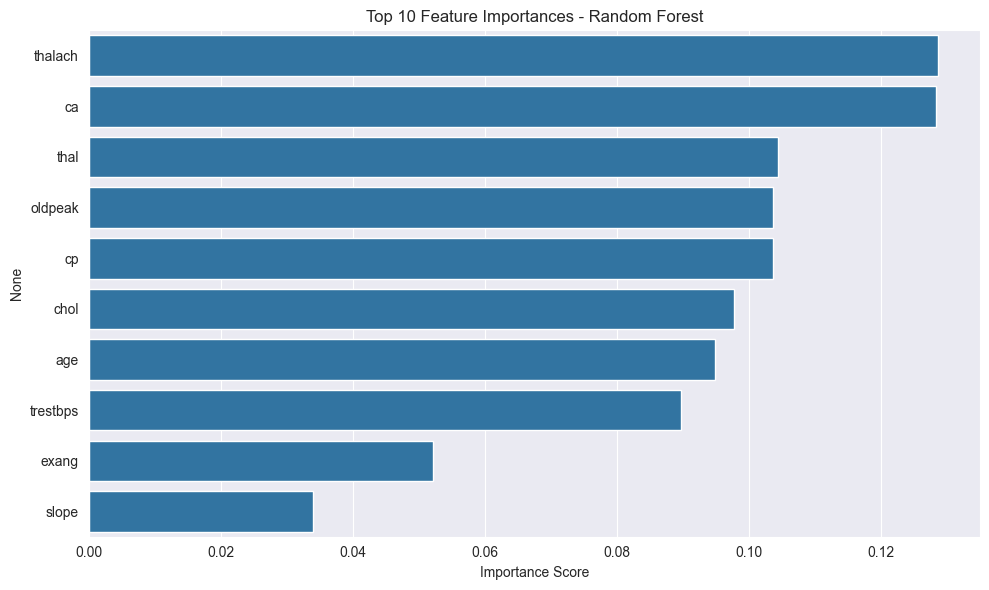

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()